<a href="https://colab.research.google.com/github/TaraRasti/Deep_Learning_F20_Assignments/blob/master/Assignment%2014/vgg16_101_object_categories_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from keras.utils import np_utils
import os
import numpy as np
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
num_classes = 102
weight_decay = 0.0005
x_shape = [32,32,3]

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activat

In [ ]:
def imread(path):
    img = scipy.misc.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img
    
path = '../input/101_objectcategories/101_ObjectCategories'
valid_exts = [".jpg", ".gif", ".png", ".jpeg"]
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

categories = sorted(os.listdir(path))
ncategories = len(categories)
imgs = []
labels = []

for i, category in enumerate(categories):
    iter = 0
    for f in os.listdir(path + "/" + category):
        if iter == 0:
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_exts:
                continue
            fullpath = os.path.join(path + "/" + category, f)
            img = scipy.misc.imresize(imread(fullpath), [32,32, 3])
            img = img.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            imgs.append(img) 
            label_curr = i
            labels.append(label_curr)

print ("Num imgs: %d" % (len(imgs)))
print ("Num labels: %d" % (len(labels)) )
print (ncategories)

[102] CATEGORIES ARE IN 
 ../input/101_objectcategories/101_ObjectCategories


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Num imgs: 9144
Num labels: 9144
102


In [ ]:
seed = 7
np.random.seed(seed)
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size = 0.1)
x_train = np.stack(x_train, axis=0)
y_train = np.stack(y_train, axis=0)
x_test = np.stack(x_test, axis=0)
y_test = np.stack(y_test, axis=0)
print ("Num train_imgs: %d" % (len(x_train)))
print ("Num test_imgs: %d" % (len(x_test)))

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Num train_imgs: 8229
Num test_imgs: 915


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8229, 32, 32, 3)
(8229, 102)
(915, 32, 32, 3)
(915, 102)


In [ ]:
batch_size = 128
maxepoches = 300
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

In [ ]:
def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False, 
    zca_whitening=False,  
    rotation_range=15,  
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=False)  

In [ ]:
datagen.fit(x_train)

sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


hist = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=maxepoches,
                    validation_data=(x_test, y_test),callbacks=[reduce_lr],verbose=2)
model.save_weights('caltech101-vgg.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
 - 9s - loss: 20.8758 - acc: 0.1110 - val_loss: 24.2300 - val_acc: 0.1180
Epoch 2/300
 - 4s - loss: 22.0873 - acc: 0.1914 - val_loss: 22.1899 - val_acc: 0.0536
Epoch 3/300
 - 4s - loss: 19.8350 - acc: 0.1995 - val_loss: 27.1399 - val_acc: 0.0219
Epoch 4/300
 - 4s - loss: 17.8984 - acc: 0.2220 - val_loss: 18.6034 - val_acc: 0.0973
Epoch 5/300
 - 4s - loss: 16.1177 - acc: 0.2337 - val_loss: 17.9706 - val_acc: 0.0984
Epoch 6/300
 - 4s - loss: 14.5844 - acc: 0.2530 - val_loss: 15.2229 - val_acc: 0.1301
Epoch 7/300
 - 4s - loss: 13.6273 - acc: 0.2216 - val_loss: 16.4725 - val_acc: 0.0962
Epoch 8/300
 - 4s - loss: 12.3022 - acc: 0.2562 - val_loss: 13.2102 - val_acc: 0.1071
Epoch 9/300
 - 4s - loss: 11.2074 - acc: 0.2788 - val_loss: 12.5144 - val_acc: 0.1443
Epoch 10/300
 - 4s - loss: 10.2336 - acc: 0.2895 - val_loss: 11.4349 - val_acc: 0.1115
Epoch 11/300
 - 4s - loss: 9.5988 - acc: 0.2801 - val_loss: 9.9838 - val_acc: 0.1497
Epoch 

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Training Accuracy: %.2f%%" % (hist.history['acc'][maxepoches - 1]*100))
print("Testing Accuracy: %.2f%%" % (scores[1]*100))

Training Accuracy: 89.37%
Testing Accuracy: 61.75%


Saved model to disk


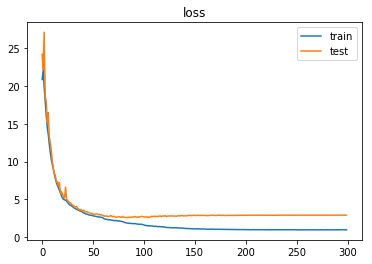

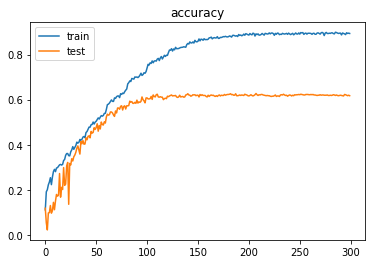

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.savefig("loss7.png",dpi=300,format="png")
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.savefig("accuracy7.png",dpi=300,format="png")
model_json = model.to_json()
with open("model7.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model")
print("Saved model to disk")